# Heart Disease


Analysis

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [4]:
# Read the heart disese data and the study results
heart_disease_path = "../datasetDNM/heart_2022_no_nans.csv"
heart_health_data = pd.read_csv(heart_disease_path)
heart_health_data.head



<bound method NDFrame.head of                  State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 4.0   
1              Alabama    Male     Very good                 0.0   
2              Alabama    Male     Very good                 0.0   
3              Alabama  Female          Fair                 5.0   
4              Alabama  Female          Good                 3.0   
...                ...     ...           ...                 ...   
246017  Virgin Islands    Male     Very good                 0.0   
246018  Virgin Islands  Female          Fair                 0.0   
246019  Virgin Islands    Male          Good                 0.0   
246020  Virgin Islands  Female     Excellent                 2.0   
246021  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ..

In [5]:
# create a dataframe
new_heart_dataframe = heart_health_data[["State", "Sex", "GeneralHealth", "MentalHealthDays", "PhysicalActivities", "SleepHours","HadHeartAttack", "HadAngina", "SmokerStatus", "RaceEthnicityCategory", "AgeCategory", "BMI","AlcoholDrinkers", "CovidPos"]]
new_heart_dataframe.head()
                                        

,State,Sex,GeneralHealth,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,SmokerStatus,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers,CovidPos
0,Alabama,Female,Very good,0.0,Yes,9.0,No,No,Former smoker,"White only, Non-Hispanic",Age 65 to 69,27.99,No,No
1,Alabama,Male,Very good,0.0,Yes,6.0,No,No,Former smoker,"White only, Non-Hispanic",Age 70 to 74,30.13,No,No
2,Alabama,Male,Very good,0.0,No,8.0,No,No,Former smoker,"White only, Non-Hispanic",Age 75 to 79,31.66,Yes,Yes
3,Alabama,Female,Fair,0.0,Yes,9.0,No,No,Never smoked,"White only, Non-Hispanic",Age 80 or older,31.32,No,Yes
4,Alabama,Female,Good,15.0,Yes,5.0,No,No,Never smoked,"White only, Non-Hispanic",Age 80 or older,33.07,No,No


In [6]:
male_heart_disease = new_heart_dataframe.loc[new_heart_dataframe["Sex"]=="Male"]
male_heart_disease.head()

,State,Sex,GeneralHealth,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,SmokerStatus,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers,CovidPos
1,Alabama,Male,Very good,0.0,Yes,6.0,No,No,Former smoker,"White only, Non-Hispanic",Age 70 to 74,30.13,No,No
2,Alabama,Male,Very good,0.0,No,8.0,No,No,Former smoker,"White only, Non-Hispanic",Age 75 to 79,31.66,Yes,Yes
5,Alabama,Male,Good,0.0,Yes,7.0,No,No,Never smoked,"White only, Non-Hispanic",Age 50 to 54,34.96,Yes,No
7,Alabama,Male,Fair,0.0,Yes,8.0,Yes,Yes,Never smoked,"White only, Non-Hispanic",Age 75 to 79,24.37,No,Yes
8,Alabama,Male,Good,0.0,No,6.0,No,No,Former smoker,"White only, Non-Hispanic",Age 40 to 44,26.94,No,Yes


In [7]:
female_heart_disease = new_heart_dataframe.loc[new_heart_dataframe["Sex"]=="Female"]
female_heart_disease.head()

,State,Sex,GeneralHealth,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,SmokerStatus,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers,CovidPos
0,Alabama,Female,Very good,0.0,Yes,9.0,No,No,Former smoker,"White only, Non-Hispanic",Age 65 to 69,27.99,No,No
3,Alabama,Female,Fair,0.0,Yes,9.0,No,No,Never smoked,"White only, Non-Hispanic",Age 80 or older,31.32,No,Yes
4,Alabama,Female,Good,15.0,Yes,5.0,No,No,Never smoked,"White only, Non-Hispanic",Age 80 or older,33.07,No,No
6,Alabama,Female,Good,0.0,Yes,8.0,No,No,Never smoked,"Black only, Non-Hispanic",Age 80 or older,33.30,No,No
9,Alabama,Female,Very good,0.0,Yes,7.0,No,No,Former smoker,"White only, Non-Hispanic",Age 75 to 79,22.60,No,No


In [8]:
# Filter data from main dataframe to get records only for individuals who had heart attack
had_heart_attack_df = new_heart_dataframe.loc[new_heart_dataframe["HadHeartAttack"]=="Yes"]
heart_attack_male_vs_female = had_heart_attack_df.value_counts("Sex")
heart_attack_male_vs_female

Sex
Male      8503
Female    4932
Name: count, dtype: int64

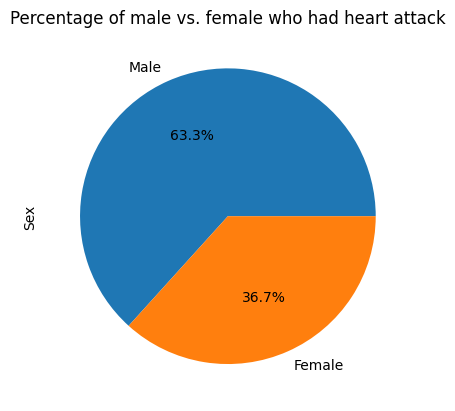

In [23]:
# Generate the pie plot for heart attack male vs.female
pie_plot = heart_attack_male_vs_female.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%', 
                                            title="Percentage of male vs. female who had heart attack")
plt.savefig("../visualizations/male_female_pieplot.png")

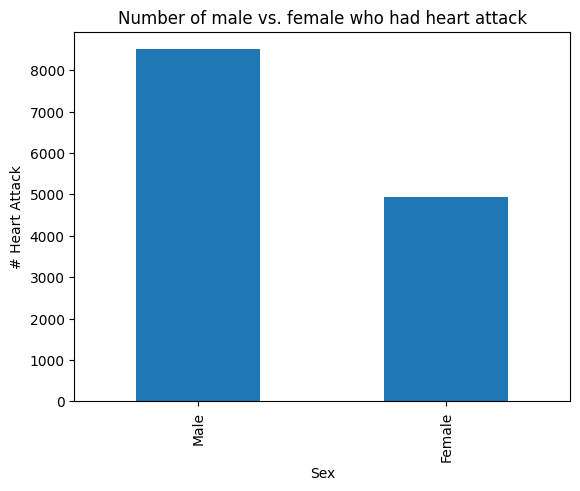

In [25]:
# Generate a bar plot showing the number of heart attacks in male vs female.
bar_chart = heart_attack_male_vs_female.plot(kind='bar', ylabel='# Heart Attack', title="Number of male vs. female who had heart attack")
plt.savefig("../visualizations/male_female_barchart.png")

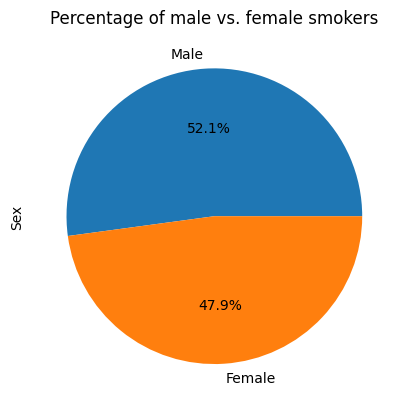

In [24]:
# Generate the pie plot for Smoker Status of male vs. female.
female_vs_male = new_heart_dataframe.loc[new_heart_dataframe["SmokerStatus"]!="Never smoked"].value_counts("Sex")
pie_plot = female_vs_male.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%', title="Percentage of male vs. female smokers")
plt.savefig("../visualizations/Smoker Status of male vs female.png")

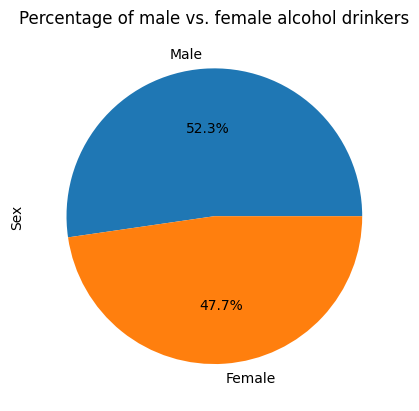

In [26]:
# Generate pie plot for alcohol drinkers of male vs. female
female_vs_male = new_heart_dataframe.loc[new_heart_dataframe["AlcoholDrinkers"]=="Yes"].value_counts("Sex")
pie_plot = female_vs_male.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%', title="Percentage of male vs. female alcohol drinkers")
plt.savefig("../visualizations/Alcohol Status of male vs female.png")

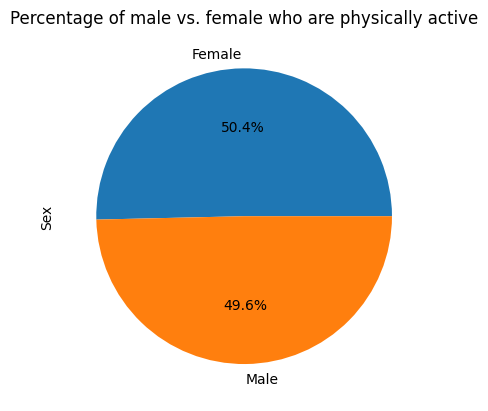

In [27]:
# Generate pie plot for physically active of male vs. female
female_vs_male = new_heart_dataframe.loc[new_heart_dataframe["PhysicalActivities"]=="Yes"].value_counts("Sex")
pie_plot = female_vs_male.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%', title="Percentage of male vs. female who are physically active")
plt.savefig("../visualizations/Physically active Status of male vs female.png")

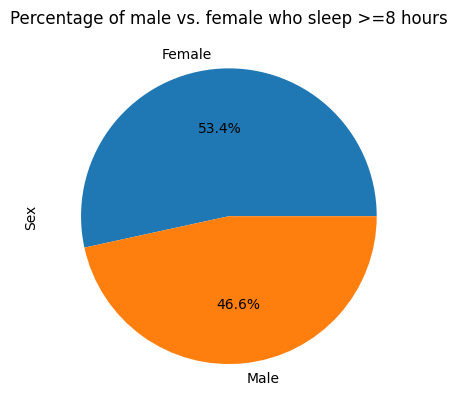

In [30]:
# Generate pie plot for general health of male vs. female
female_vs_male = new_heart_dataframe.loc[new_heart_dataframe["SleepHours"]>=8.0].value_counts("Sex")
pie_plot = female_vs_male.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%', title="Percentage of male vs. female who sleep >=8 hours")
plt.savefig("../visualizations/Sleep hours 8 or more male vs female.png")